# Supervised Machine Learning

Uses previously **labeled** data to train an algorithm (i.e the output is known). The algorithm learns if it is doing right by comparing the predicted vs the real output.

Simplified steps:
1. Data collection and processing.
2. Division of training data in Train and Test sets.
3. Use the train set to train the model.
4. Predict an output for the test set and compare the predicted vs real results.
5. Improve the model until we are satisfied with the performance on the test set

## Types of supervised ML models
### Classification
Classification problems are characterized by having categorical output (i.e: active, inactive), so the model tries to predict to which class the input belongs. It can include several classes, is not limited to a binary classification.

### Regression
Regression problems are characterized by continuous variables, where the model tries to predict the exact value of the input (i.e: IC50 of a specific compound)

## Evaluation of supervised ML models

### Classification metrics

We obtain the following data to evaluate the model:
- Y_pred: predictions on the test set
- Y_real: real outcome of the test set

**Accuracy:** number of correct predictions divided by the total number of predictions (TP/(lenY)). For example, if we have predicted correctly 5 out of 10 data points --> Accuracy = 50%

**Precision**: identification of only real positives (with a 100% precision, a model does not classify any negatives as positive) --> TP/(TP+FP)

**Recall**: identification of all positives (with a 100% recall, no positive is classified as negative, but some negatives might be included in the positives) --> TP / (TP+FN)

**Confusion matrix**: plots the real vs the predicted values in a table, to easily obtain the FP, TP, TN, FN values.


### Regression metrics
In a regression task, we obtain as error the difference between the predicted value and the real value (i.e: IC50real=0.1, IC50pred = 0.5 --> error of 0.4).


**Mean Absolute Error:** mean of the absolute values of errors. 

**Mean Squared Error:** mean of the square error. By squaring, larger errors are contributing more and therefore the model punishes them.

**Root Mean Squared Error:** root of the mean of square error to simplify interpretation (by using MSE, we also square the units which makes them difficult to interpret).

**R-square**: coefficient of determination, the amount of variance explained by the model (from 0 to 1, the closer to 1, the better our model is)

# Sklearn Package

Sklearn is the most popular package for machine learning in python. We are going to go over the basic features of sklearn to train a model that predicts the quality of the Portuguese Wines from *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

First, install the sklearn package by either :
- `$pip install -U scikit-learn` on the command line
- `!pip install -U scikit-learn` on a jupyter notebook cell

And then, import on the notebook only the modules that we are going to use. The package is very large, so we will only import specific chunks of it. Run the code below to import the necessary modules to perform a basic classification problem:

- `from sklearn.model_selection import train_test_split`
- `from sklearn.linear_model import LogisticRegression`

In [2]:
!pip install -U scikit-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0
    Uninstalling scikit-learn-1.0:
      Successfully uninstalled scikit-learn-1.0


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\gemma\\anaconda3\\envs\\udemy\\lib\\site-packages\\~klearn\\.libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Logistic regression on a classification task

#### Data collection
Load the wine dataset into a pandas dataframe, as we have been working with it in session 3 we already know its characteristics.

In [4]:
import pandas as pd
df = pd.read_csv("../session3/winequality-red.csv")

Text(0, 0.5, 'number of wines')

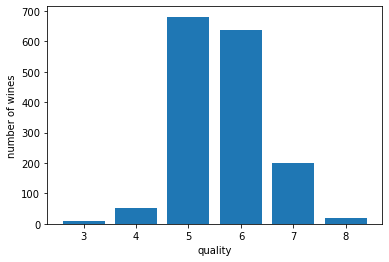

In [5]:
#check the labeled output: 
import matplotlib.pyplot as plt

y = df.groupby("quality", as_index=False).nunique()
plt.bar(x = y["quality"], height=y["name"])
plt.xlabel("quality")
plt.ylabel("number of wines")

We could use the discrete values as a multiclass classification problem, but, to simplify our first analysis, we will define a cutoff:
- Wines of quality => 7 --> good (1)
- Wines of quality < 7 --> bad (0)

To this end, we will add a classification (clf) column to our dataset, containing only 0 or 1

In [6]:
#add a classification column to the dataframe:

clf = [] #we create an empty list where we will add the clf values

quality = df["quality"].tolist() #pass the quality column to a list 

#iterate over the quality list and append values to the clf list
for item in quality:
    if item < 7:
        clf.append(0)
    else:
        clf.append(1)

#add the clf list as a column in the dataframe:
df["clf"]=clf

In [7]:
#check how many values of each type we have
df["clf"].value_counts()

0    1382
1     217
Name: clf, dtype: int64

In [8]:
#assert that the classification was right
assert df["clf"].value_counts()[1] == (len(df[df["quality"]>=7]))

#the assert function is very useful as a checkpoint to understand if our data was correct

#### Train test split

Now, we want to use the physicochemical properties of each wine to try and predict its quality (1 or 0). The dataset has already been cleaned for us, so we do not need to process it further (eliminate empty columns, deal with outliers etc).

The next step is to divide the data into train and test. For this, we use the built-in function train_test_split in sklearn.

First, we need to determine what are the X and Y of our model:
X - Element to predict
Y - Output

Of course, the element to predict (x) is the wine, but, the algorithm needs at least one property of the wine to be able to predict its quality (the output, y). Let's start by identifying a property that correlates with the wine quality:

In [9]:
#Check if there is a property with different mean for good vs bad wine

good = df[df["clf"]==1]
bad = df[df["clf"]==0]

print(good.mean(axis=0))
print(bad.mean(axis=0))


fixed acidity            8.847005
volatile acidity         0.405530
citric acid              0.376498
residual sugar           2.708756
chlorides                0.075912
free sulfur dioxide     13.981567
total sulfur dioxide    34.889401
density                  0.996030
pH                       3.288802
sulphates                0.743456
alcohol                 11.518049
quality                  7.082949
clf                      1.000000
dtype: float64
fixed acidity            8.236831
volatile acidity         0.547022
citric acid              0.254407
residual sugar           2.512120
chlorides                0.089281
free sulfur dioxide     16.172214
total sulfur dioxide    48.285818
density                  0.996859
pH                       3.314616
sulphates                0.644754
alcohol                 10.251037
quality                  5.408828
clf                      0.000000
dtype: float64


C:\Users\Gemma\Anaconda3\envs\udemy\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
C:\Users\Gemma\Anaconda3\envs\udemy\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


In [46]:
#Sulfur dioxide looks quite different between good and bad, so let's start here:

x = df[["total sulfur dioxide","free sulfur dioxide"]] #we use the total sulfur dioxide as the wine representation
y = df["clf"] #we use the classification 0 or 1 as prediction outcome

In [47]:
#let's call the sklearn function train_test_split using the x and y values we have defined above
#test_size indicates the % of the total data that will be kept to test the model prediction

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [48]:
# to better understand what train and test split does, lets print the four outcomes one by one:
X_train.head()

,total sulfur dioxide,free sulfur dioxide
794,26.0,7.0
1517,44.0,29.0
367,24.0,11.0
473,14.0,5.0
1530,18.0,9.0


In [49]:
y_train.head()

794     0
1517    0
367     0
473     0
1530    0
Name: clf, dtype: int64

In [50]:
X_test.head()

,total sulfur dioxide,free sulfur dioxide
1352,57.0,14.0
489,26.0,10.0
497,113.0,43.0
1243,86.0,10.0
601,35.0,12.0


In [52]:
y_test.head()

1352    0
489     0
497     0
1243    0
601     0
Name: clf, dtype: int64

#### Model Training
We have now created a train set with its associated outcome (0 or 1) and a test set with its associated outcome as well (1) and it is time to train a model.

One of the simplest classification algorithms is based on a logistic regression, or sigmoid function. The sigmoid takes any value and outputs a value between 0 and 1, basically a probability that a point belongs to the 0 or the 1 class


In [17]:
#we instanciate the model as a Logistic Regression from sklearn

mdl = LogisticRegression()

#and then we train (fit) the model using our training data
mdl.fit(X_train, y_train)

LogisticRegression()

In [18]:
#we then predict the probability of the wines in the test set being 0 (first column) or 1 (second column)
pred = mdl.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Model performance
We have trained a Logistic Regression model using a train set, and predicted the outcome on a test set for which we have the actual values. Let's check how good our model did.
We can use the classification report and the confusion matrix methods built-in in sklearn.

In [19]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [20]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       273
           1       0.00      0.00      0.00        47

    accuracy                           0.85       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.85      0.79       320



C:\Users\Gemma\Anaconda3\envs\udemy\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gemma\Anaconda3\envs\udemy\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gemma\Anaconda3\envs\udemy\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
confusion_matrix(y_test, pred)

array([[273,   0],
       [ 47,   0]], dtype=int64)

[Text(0, 0.5, 'Bad'), Text(0, 1.5, 'Good')]

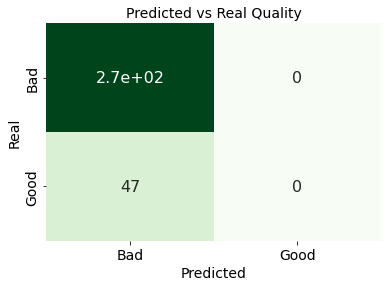

In [22]:
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens', cbar=False, annot_kws={"size": 16})
ax.set_title("Predicted vs Real Quality", fontsize=14)
ax.set_xlabel('Predicted', fontsize=14)
ax.set_ylabel('Real', fontsize=14);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Bad','Good'], fontsize=14)
ax.yaxis.set_ticklabels(['Bad','Good'], fontsize=14)


So, our model cannot very accurately predict if a wine is good using only the Sulfur Dioxide content of each wine as input. Let's try to add all the variables we have as input:

In [23]:
df.columns

Index(['name', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'clf'],
      dtype='object')

In [53]:
x = df[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [55]:
X_train #X is a dataframe containing the relevant columns for prediction

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
1001,9.9,0.350,0.38,1.5,0.058,31.0,47.0,0.99676,3.26,0.82,10.6
1351,7.2,0.620,0.01,2.3,0.065,8.0,46.0,0.99332,3.32,0.51,11.8
157,7.1,0.430,0.42,5.5,0.071,28.0,128.0,0.99730,3.42,0.71,10.5
42,7.5,0.490,0.20,2.6,0.332,8.0,14.0,0.99680,3.21,0.90,10.5
...,...,...,...,...,...,...,...,...,...,...,...
1044,6.4,0.390,0.33,3.3,0.046,12.0,53.0,0.99294,3.36,0.62,12.2
432,11.9,0.370,0.69,2.3,0.078,12.0,24.0,0.99580,3.00,0.65,12.8
722,7.6,0.420,0.08,2.7,0.084,15.0,48.0,0.99680,3.21,0.59,10.0
485,10.2,0.670,0.39,1.9,0.054,6.0,17.0,0.99760,3.17,0.47,10.0


In [56]:
mdl = LogisticRegression(max_iter=10000, verbose=3)
mdl.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s finished


LogisticRegression(max_iter=10000, verbose=3)

In [57]:
pred = mdl.predict(X_test)

[Text(0, 0.5, 'Bad'), Text(0, 1.5, 'Good')]

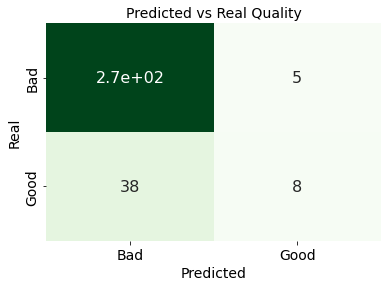

In [58]:
cf_matrix = confusion_matrix(y_test, pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens', cbar=False, annot_kws={"size": 16})
ax.set_title("Predicted vs Real Quality", fontsize=14)
ax.set_xlabel('Predicted', fontsize=14)
ax.set_ylabel('Real', fontsize=14);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Bad','Good'], fontsize=14)
ax.yaxis.set_ticklabels(['Bad','Good'], fontsize=14)

### ROC-AUC curve
Using the predict_proba function of sklearn, we can create a ROC curve to evaluate the model performance

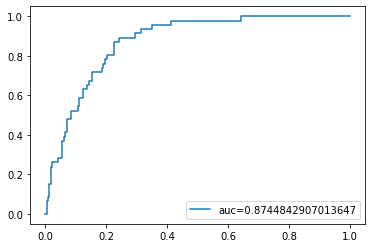

In [63]:
pred_prob = mdl.predict_proba(X_test)

fpr, tpr, _ = metrics.roc_curve(y_test,  pred_prob[:,1]) #we are interested in the probability of being 1 (good)
auc = metrics.roc_auc_score(y_test, pred_prob[:,1])
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

Training the model with a better description of the wines has improved the performance (of the 24 predicted good wines, 7 were actually good), but we might want to refine it further. In this situation, there is a number of options to continue:
- Increase the training sample
- Increase the number of wine descriptors
- Choose another algorithm

### Regression task

We have seen how to train a classification. We can use the same dataset to train a regression, if we consider the quality of the wine to be a continuous variable (from 0 to 10).

First, we need to create a train/test split where the y's, this time, will be the `quality` column instead of the `clf` column.

In [30]:
x = df[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

y=df["quality"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Now, we will import a sklearn model for Linear Regression, the simplest regression type.

In [34]:
from sklearn.linear_model import LinearRegression

In [36]:
mdl = LinearRegression()
mdl.fit(X_train, y_train)

LinearRegression()

In [39]:
pred = mdl.predict(X_test)
pred

array([5.76130993, 5.38555692, 4.98721728, 6.74647428, 5.96933667,
       6.38332651, 5.49351458, 6.13365519, 5.25006887, 6.11326553,
       5.87043749, 6.24222961, 5.20500595, 5.04897881, 5.78364406,
       6.43253908, 4.26276372, 5.05008735, 5.82402913, 6.84279287,
       6.46159675, 5.12289719, 5.98500423, 5.80461487, 5.84332858,
       6.18531024, 5.57101188, 5.59637751, 5.19985828, 5.26462329,
       5.38196334, 5.83787412, 4.97367997, 6.66092697, 4.97405153,
       5.31331215, 5.05072833, 5.73933102, 5.4621585 , 5.42394958,
       6.76523832, 5.87438507, 5.15828373, 6.58059712, 5.17875096,
       4.98027151, 5.96219636, 5.58061034, 5.29411201, 5.51352004,
       5.11797541, 6.51237162, 5.38951874, 5.13861537, 5.59106026,
       6.38710976, 6.20316195, 5.53326499, 5.8736259 , 4.4745085 ,
       6.08568676, 4.76762449, 5.39016242, 5.44668786, 6.75945597,
       5.62991593, 6.52831824, 5.28562386, 6.45745213, 6.06207394,
       5.50970131, 5.06921856, 5.81821561, 5.12498727, 5.25972

#### Metrics for regression

In this case, we will use the MAE, MSE and RMSE values. We can import the MAE and MSE formulas from sklearn and then calculate the RMSE and R

In [44]:
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = mse**(0.5)  
r2 = metrics.r2_score(y_test, pred)

print("MAE:"+ str(mae))
print("MSE:" + str(mse))
print("RMSE:" + str(rmse))
print("R2:" + str(r2))

MAE:0.5048586006434848
MSE:0.43805458108095624
RMSE:0.6618569188887854
R2:0.31803713964531266


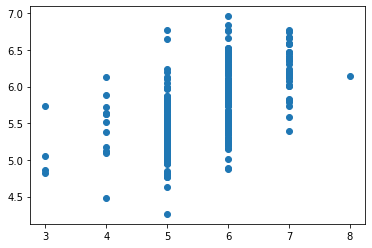

In [45]:
plt.scatter(y_test, pred)